In [1]:
%display latex
Parallelism().set(nproc=6) #give us some multithreading to make things faster 
viewer3D = 'threejs'

In [2]:
M = Manifold(3, 'M', structure='Lorentzian')
print(M)

3-dimensional Lorentzian manifold M


In [3]:
X.<t,r,th> = M.chart(r"t r:(0,+oo) th:(-pi,pi):\theta")
X[:]

(t, r, th)

In [4]:
R = var("R")
assume(R > 0)

w = var("w")
assume(w >= 0)

assume(r > 0)

In [5]:
#hat = lambda s, bigRadius: lambda r: ((tanh(s*(r+bigRadius)))-(tanh(s*(r-bigRadius))))/(2*tanh(s*bigRadius)) 
hat = lambda bigRadius: lambda r: 1 - (1 / (1+exp(bigRadius-r)))

hat(R)(r)

-1/(e^(R - r) + 1) + 1

In [7]:
radius_prime = lambda bigRadius, throatRadius: lambda r: hat(bigRadius)(r) * (bigRadius+throatRadius) * sin(pi*(r/(bigRadius+throatRadius))) + (1-hat(bigRadius)(r)) * (throatRadius+r-bigRadius)
assume(radius_prime(R, w)(r) > 0)
radius_prime(R, w)(r)

-(R + w)*(1/(e^(R - r) + 1) - 1)*sin(pi*r/(R + w)) - (R - r - w)/(e^(R - r) + 1)

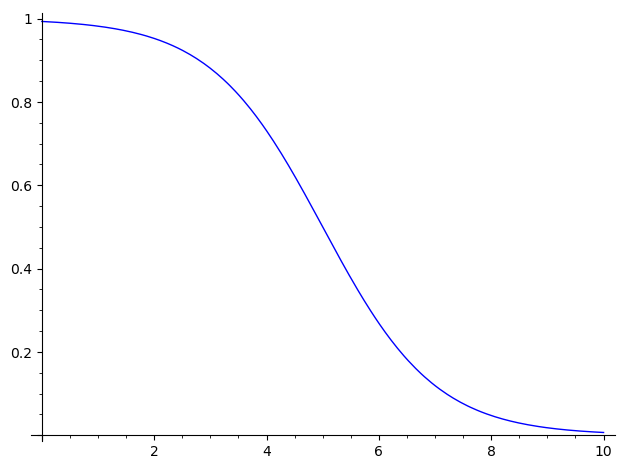

In [8]:
plot(hat(5), xmin = 0, xmax = 10)

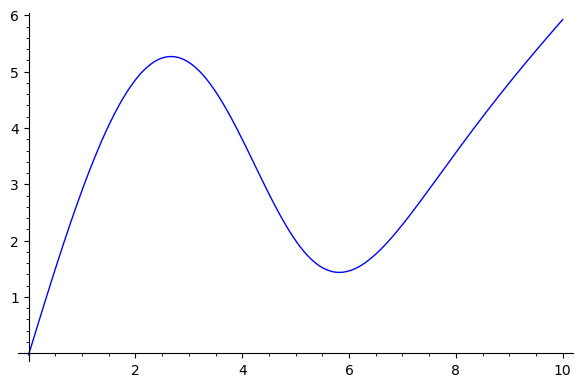

In [9]:
plot(radius_prime(5, 1), xmin=0, xmax=10) # this effective radius must always be postive

In [10]:
g = M.metric()

g[0,0] = -1
g[1,1] = 1
g[2,2] = radius_prime(R, w)(r)^2
g.display()

g = -dt*dt + dr*dr + ((R + w)*(1/(e^(R - r) + 1) - 1)*sin(pi*r/(R + w)) + (R - r - w)/(e^(R - r) + 1))^2 dth*dth

In [11]:
g[:]

[                                                                                 -1                                                                                   0                                                                                   0]
[                                                                                  0                                                                                   1                                                                                   0]
[                                                                                  0                                                                                   0 ((R + w)*(1/(e^(R - r) + 1) - 1)*sin(pi*r/(R + w)) + (R - r - w)/(e^(R - r) + 1))^2]

In [12]:
g.christoffel_symbols_display()

Gam^r_th,th = -(w^2*e^(R + 2*r) - (R^2*e^(2*R + r) + 2*R*w*e^(2*R + r) + w^2*e^(2*R + r))*sin(pi*r/(R + w))^2 - (((2*R - 1)*e^R - 2*r*e^R)*e^(2*r) - e^(3*r))*w + ((pi*e^(2*R + r) + pi*e^(R + 2*r))*w - (pi*R*e^R - pi*r*e^R)*e^(2*r) - (pi*R*e^(2*R) - pi*r*e^(2*R))*e^r)*cos(pi*r/(R + w)) - (R - r)*e^(3*r) - ((2*R - 1)*r*e^R - r^2*e^R - (R^2 - R)*e^R)*e^(2*r) + (w^2*(e^(2*R + r) - e^(R + 2*r)) - ((r*e^R - e^R)*e^(2*r) - (r*e^(2*R) + e^(2*R))*e^r)*w + (pi*R*e^(3*R) + pi*R*e^(2*R + r) + (pi*e^(3*R) + pi*e^(2*R + r))*w)*cos(pi*r/(R + w)) - (R*r*e^R - (R^2 + R)*e^R)*e^(2*r) + (R*r*e^(2*R) - (R^2 - R)*e^(2*R))*e^r)*sin(pi*r/(R + w)))/(e^(3*R) + 3*e^(2*R + r) + 3*e^(R + 2*r) + e^(3*r)) 
Gam^th_r,th = ((pi*e^(2*R) + pi*e^(R + r))*cos(pi*r/(R + w)) + w*e^(R + r) - ((R - 1)*e^R - r*e^R)*e^r - (R*e^(R + r) + w*e^(R + r))*sin(pi*r/(R + w)) + e^(2*r))/(w*(e^(R + r) + e^(2*r)) - (R - r)*e^(2*r) - (R*e^R - r*e^R)*e^r + (w*(e^(2*R) + e^(R + r)) + R*e^(2*R) + R*e^(R + r))*sin(pi*r/(R + w)))

In [13]:
g.christoffel_symbols()[0,0,1] == g.christoffel_symbols()[0,1,0]

True

In [14]:
Ruv= g.ricci()
Ruv[:]

[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [15]:
Rscal = g.ricci_scalar()
print(Rscal)

Scalar field r(g) on the 3-dimensional Lorentzian manifold M


In [16]:
E = Ruv - ((1/2)*(Rscal*g))
E[0,0](0, r, th)(1,1)

1/4*(4*(pi*w*e^3 + pi*e^3)*cos(pi/(w + 1)) - 4*w*e^3 + (pi^2*e^3 + (2*pi^2 + 1)*e^3 + (pi^2 - 1)*e^3)*sin(pi/(w + 1)) - 4*e^3)/(w^2*e^3 + w*e^3 + (w^2*e^3 + 2*w*e^3 + e^3)*sin(pi/(w + 1)))

In [17]:
cordshift = lambda x, y: (sqrt(x^2+y^2), arctan(y/x))
massEnergyDensity= E[0,0]

def mass_dist(x, y):
    radius, angle = cordshift(x, y)
    return massEnergyDensity(0, radius, angle)

In [35]:
x, y = var('x y')
plot3d(mass_dist(x, y)(2.5, 2), (x,-4,4), (y,-4,4)) #has annoying singularity unlike in R^2

Graphics3d Object